### Machine Learning:

* Making a machine to learn from the previous experiences.
* There are three categories in machine learning algorithms.
    * Supervised learning --- Supervision will be there on the model
        * Regression -- Finds the relation between the dependent and the independent variables.
        * Classification -- categorizes the given data
    * Unsupervised Learning -- No supervision will not be there on the model
        * Clusters -- makes the data into different groups.
        * Associative --- makes the groups into some other groups
    * Reinforcement learning --- learns from the envinornment.
    

### Linear Regression:

* This is one of the algorithm which is used to finds the relation between the input and the output.
* Linear Regression comes under regression.
* The values in linear regression are multicolinear.
* To apply this algorithm we use the slope of the line equation.

    y = mx + c
    
    * m is the coefficient
    * c is the slope

In [1]:
### Importing the datasets.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AP-Skill-Development-Corporation/KLU_machineLearning/main/Day-2(16-03-2021)/Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.drop("Unnamed: 0",axis = 1,inplace = True)

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [8]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
## dividing the data into input and output:

X = data['TV'].values
X.shape

(200,)

In [23]:
y = data['Sales'].values
y.shape

(200,)

**y = mx + c**

**equation of m:**

<img src = "https://atmos.washington.edu/~robwood/teaching/451/labs/images/concepts11.gif">


**equation for c**:

c = mean_y - (m*mean_x)

In [24]:
## calculating the coefficeient Mean X and Y:

mean_x = np.mean(X)
print(mean_x)
mean_y = np.mean(y)
print(mean_y)

147.0425
14.0225


In [25]:
## Total number of values:

n = len(X)
numer = 0
denom = 0
for i in range(n):
    numer += (X[i]-mean_x)*(y[i]-mean_y)
    denom += (X[i]-mean_x)**2
m = numer/denom
c = mean_y - (m*mean_x)

print(m)
print(c)

0.04753664043301969
7.032593549127704


In [26]:
print("The linear model is : Y = {:.5} + {:.4}X".format(c,m))

The linear model is : Y = 7.0326 + 0.04754X


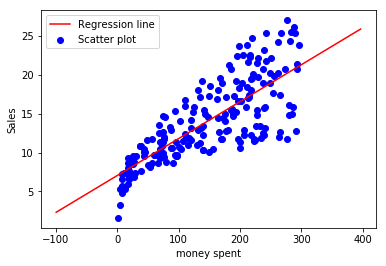

In [29]:
## plotting the values and regression line:

max_x = np.max(X) + 100
min_x = np.min(X) - 100

### calculating line values x and y:

x = np.linspace(min_x,max_x,1000)
Y = m*x + c
### plotting line:

plt.scatter(X,y,color = 'b',label = "Scatter plot")
plt.plot(x,Y,c = "r",label = "Regression line")
plt.xlabel("money spent")
plt.ylabel("Sales")
plt.legend(loc = "best")
plt.show()

In [30]:
y_pred = c + m*X[2]
print(y_pred)

7.8502237645756425


In [31]:
X[2]

17.2

In [32]:
y[2]

9.3

In [33]:
X[10]

66.1

In [35]:
y[10]

8.6

In [36]:
y_pred = c + m*X[10]
print(y_pred)

10.174765481750304


In [39]:
## calculating the r2 score:

ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = m*X[i] + c
    ss_tot += (y[i] - mean_y)**2
    ss_res += (y[i] - y_pred)**2
r2 = 1-(ss_res/ss_tot)
print("R2_score")
print(r2 * 100)
    

R2_score
61.187505085007075


In [40]:
from sklearn.linear_model import LinearRegression


In [46]:
### collecting the data:

X = data["TV"].values.reshape(-1,1)
y = data["Sales"].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
help(reg)

Help on LinearRegression in module sklearn.linear_model.base object:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, 

In [48]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

0.047536640433019764
7.032593549127693


In [51]:
print("The Linear model is : Y = {:.5} + {:.4}X".format(reg.intercept_[0],reg.coef_[0][0]))

The Linear model is : Y = 7.0326 + 0.04754X


In [52]:
predictions = reg.predict(X)

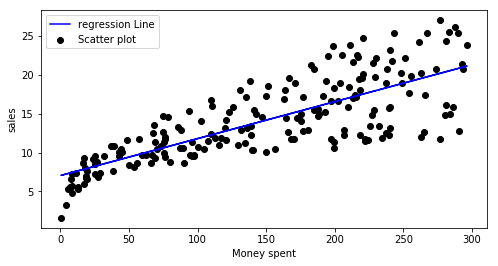

In [53]:
plt.figure(figsize = (8,4))
plt.scatter(data['TV'],data["Sales"],c = "0",label = "Scatter plot")
plt.plot(data["TV"],predictions,c = "blue",label = "regression Line")
plt.xlabel("Money spent")
plt.ylabel("sales")
plt.legend(loc = "best")
plt.show()

In [55]:
### r2 score:

r2  = reg.score(X,y)
print(r2* 100)

61.187505085007096


In [56]:
reg.predict([[17.2]])

array([[7.85022376]])

#### Task :

**Apply Linear regression for two input columns Tv and Newspaper**
